## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
df = pd.read_csv ('https://raw.githubusercontent.com/juanhubertl8010/dataset/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a **tidak punya missing value**. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-ebdedc1733dc>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time']).dt.date
<ipython-input-5-ebdedc1733dc>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['date_time']).dt.hour


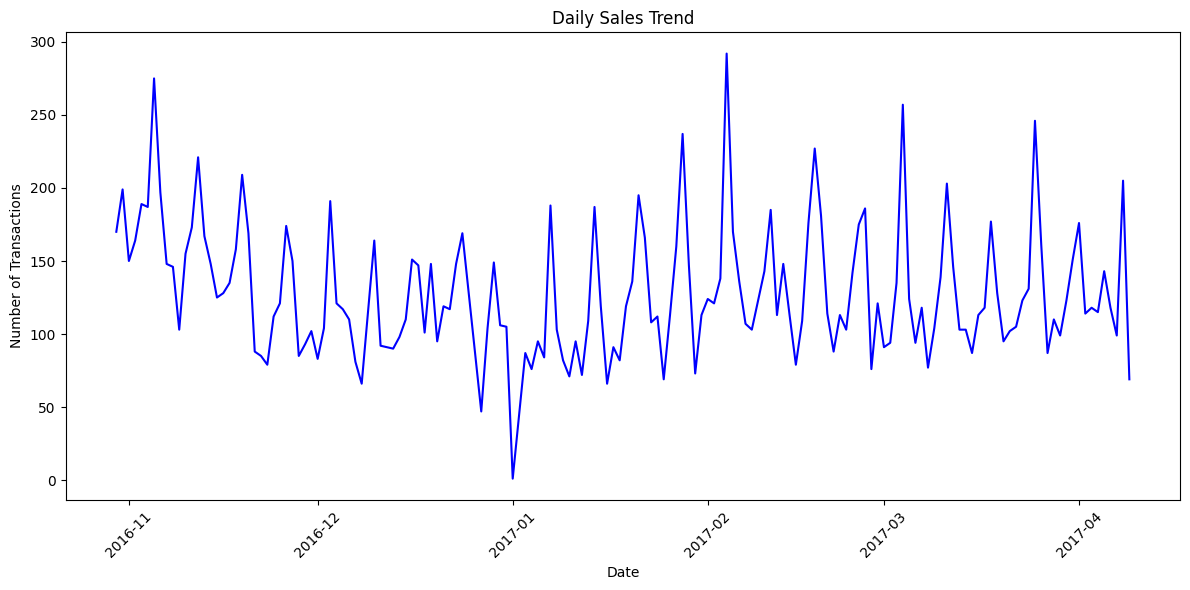

In [5]:
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['hour'] = pd.to_datetime(df['date_time']).dt.hour


# Aggregate data: Count transactions per day
daily_sales = df.groupby('date').size()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Transactions', linestyle='-', marker='', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [6]:
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,day,month,year,time,day_name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,9,30,10,2016,09:58:00,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,30,10,2016,10:05:00,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,30,10,2016,10:05:00,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,30,10,2016,10:07:00,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,30,10,2016,10:07:00,Sunday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


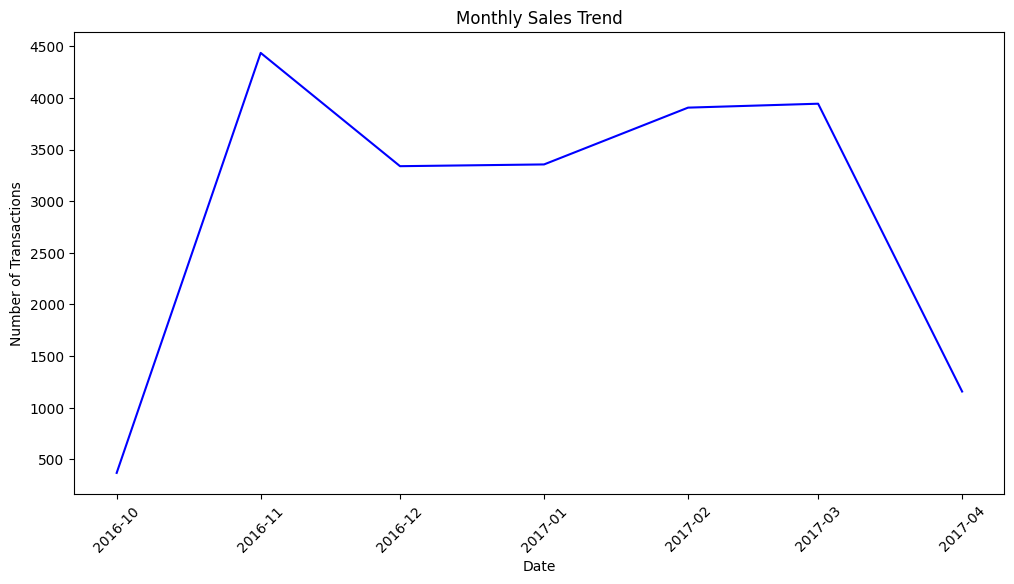

In [7]:
monthly_sales = df.groupby(['year', 'month']).size().reset_index(name='transactions')

# Create a new column for plotting as 'YYYY-MM'
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['transactions'], label='Transactions', linestyle='-', marker='', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Sales Trend')

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

8. Now, the visualization above provides better insights: **iya terlihat lebih jelas visualisasi datanya, dapat dilihat pada bulan 11 tahun 2016 merupakan peak order.** (fill that blank on the section below)

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [8]:
weekday_names = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()

# Extract unique weekend names
weekend_names = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [9]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

# Group and aggregate data
grouped = df.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Create the pivot table
pivot_table = grouped.pivot_table(index='month', columns='day_name', values='total_transactions', fill_value=0)

# Rearrange columns to follow the desired day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(columns=day_order)
pivot_table = pivot_table.astype(int)
# Display the result
pivot_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is

Peak Transaction Days

Weekday Patterns


Seasonal Changes

Month-to-Month Variations

Customer Behavior Trends


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


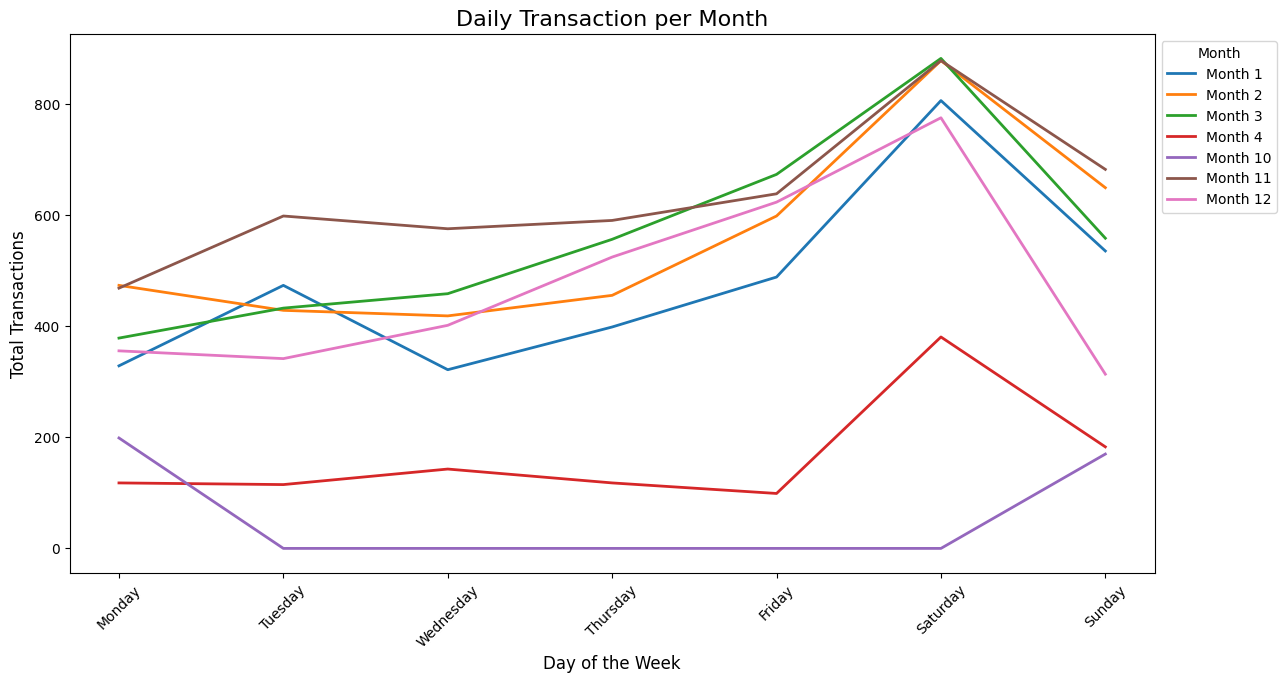

In [10]:


# Transpose the pivot table so that the days of the week are on the x-axis
pivot_table_t = pivot_table.T

# Plot the line chart
plt.figure(figsize=(14, 7))

# Plot each month's data as a line, where the x-axis is the day of the week
for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

# Add title and labels
plt.title('Daily Transaction per Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

# Add grid for better readability


# Add a legend to show which line corresponds to which month
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to fit everything


# Show the plot
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that pembelian paling banyak terjadi saat weekend

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [11]:
df['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [12]:
morning_hour = df.loc[df['period_day'] == 'morning', 'hour'].unique()

# Extract unique weekend names
afternoon_hour = df.loc[df['period_day'] == 'afternoon', 'hour'].unique()

evening_hour = df.loc[df['period_day'] == 'evening', 'hour'].unique()

night_hour = df.loc[df['period_day'] == 'night', 'hour'].unique()

print("Unique morning_hour:", morning_hour)
print("Unique afternoon_hour:", afternoon_hour)
print("Unique evening_hour:", evening_hour)
print("Unique night_hour:", night_hour)

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

tidak ada jam 12 malam sedangkan di situ ada jam 1 pagi


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


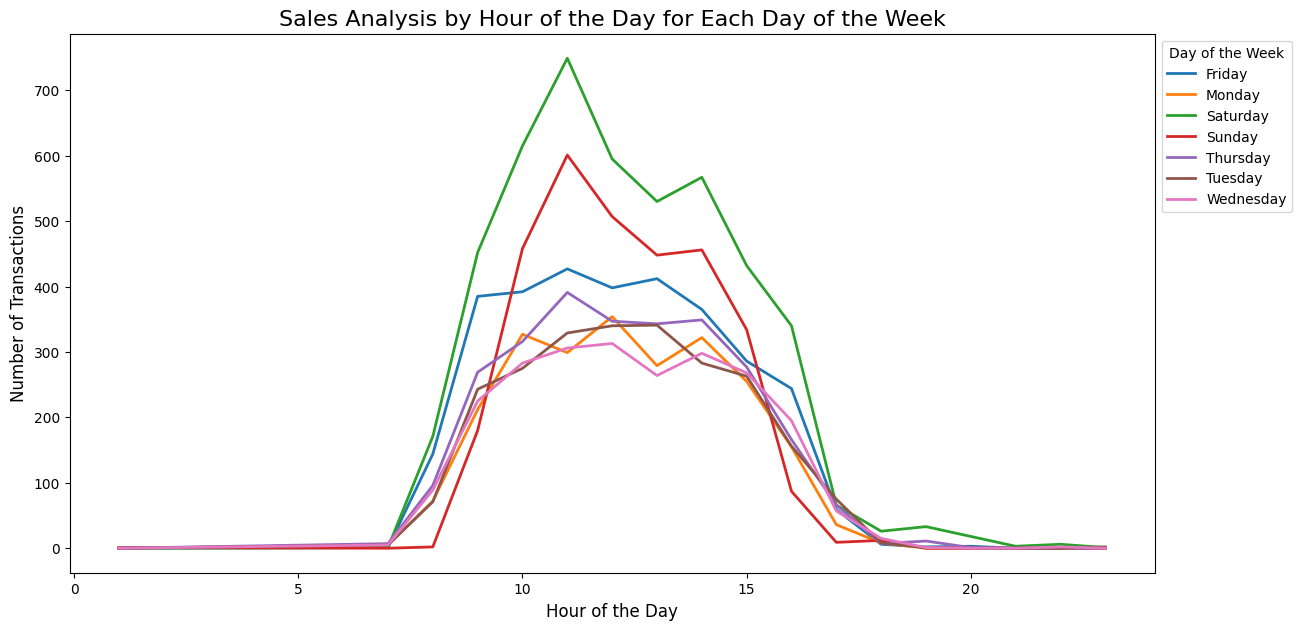

In [13]:
# 17# Aggregate the total number of transactions by hour for each day of the week
sales_by_hour = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

# Plot the line chart for each day
plt.figure(figsize=(14, 7))

for day in sales_by_hour.columns:
    plt.plot(sales_by_hour.index, sales_by_hour[day], label=day, linewidth=2, markersize=6)

# Add title and labels
plt.title('Sales Analysis by Hour of the Day for Each Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Add grid for better readabilit

# Add a legend for the days of the week
plt.legend(title='Day of the Week', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to ensure everything fits


# Show the plot
plt.show()


18. The daily sales trend plot reveals that _______

Morning Peak for Some Days


Afternoon Increase

Evening Drop or Stability

Nighttime Activity

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


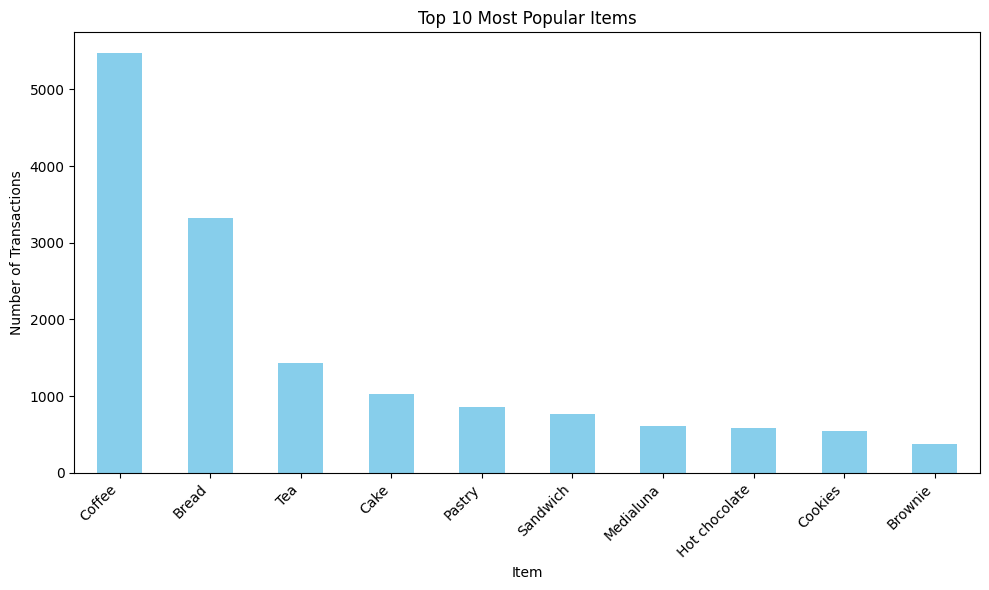

In [14]:
# 19
item_counts = df.groupby('Item').size().sort_values(ascending=False)

# Get top 10 most popular items
top_items = item_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Most Popular Items')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


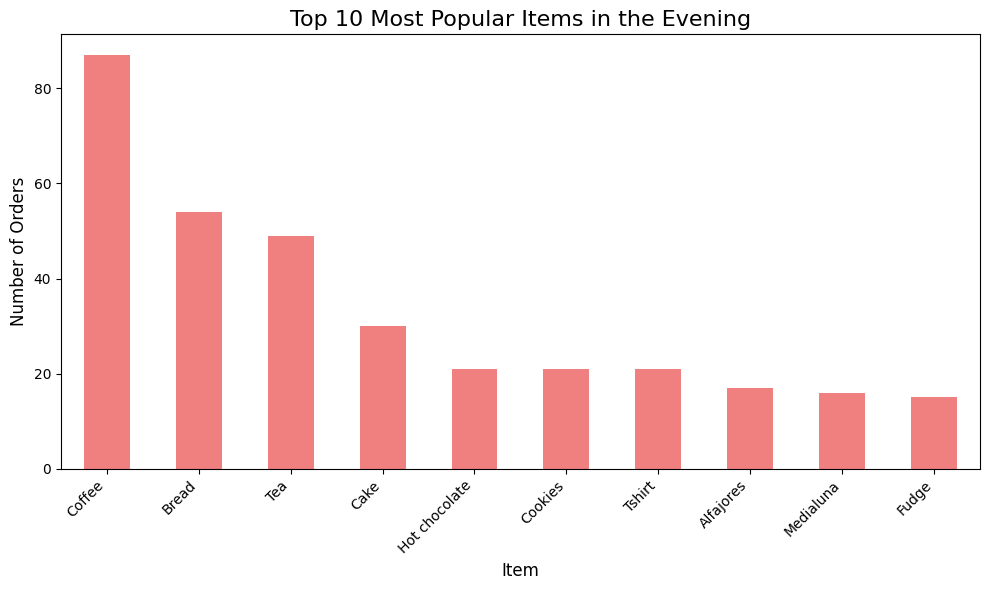

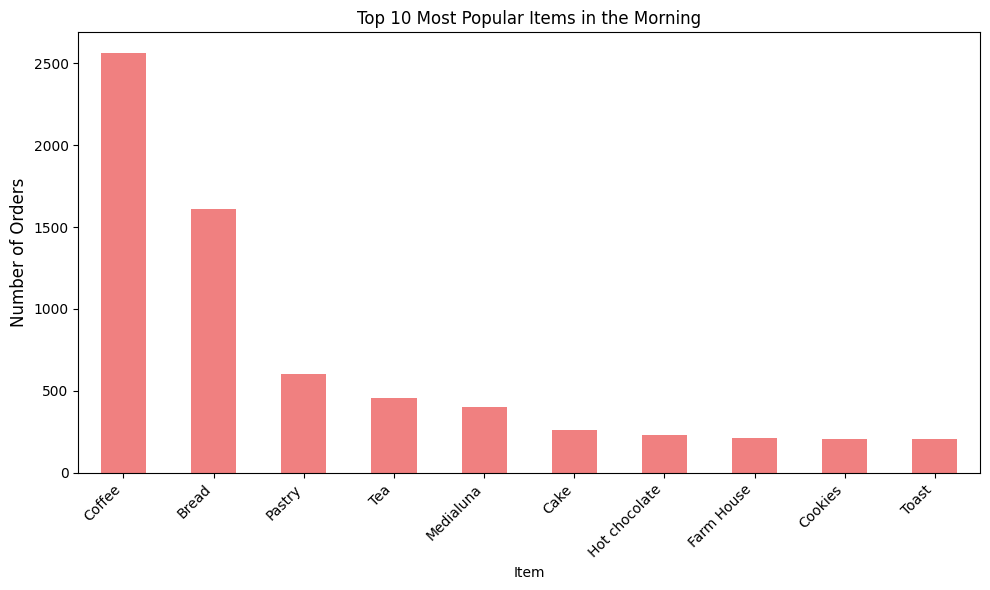

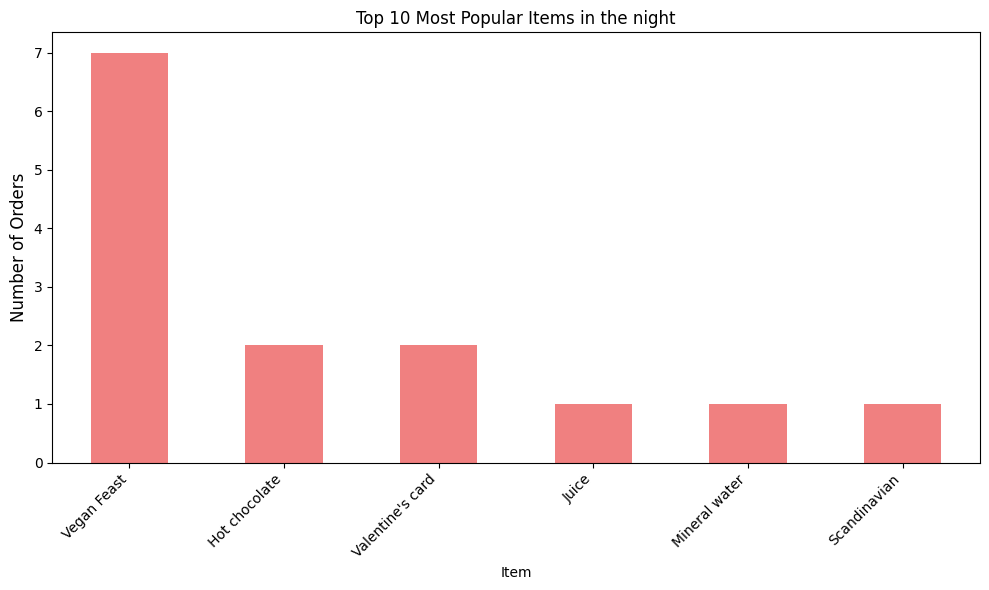

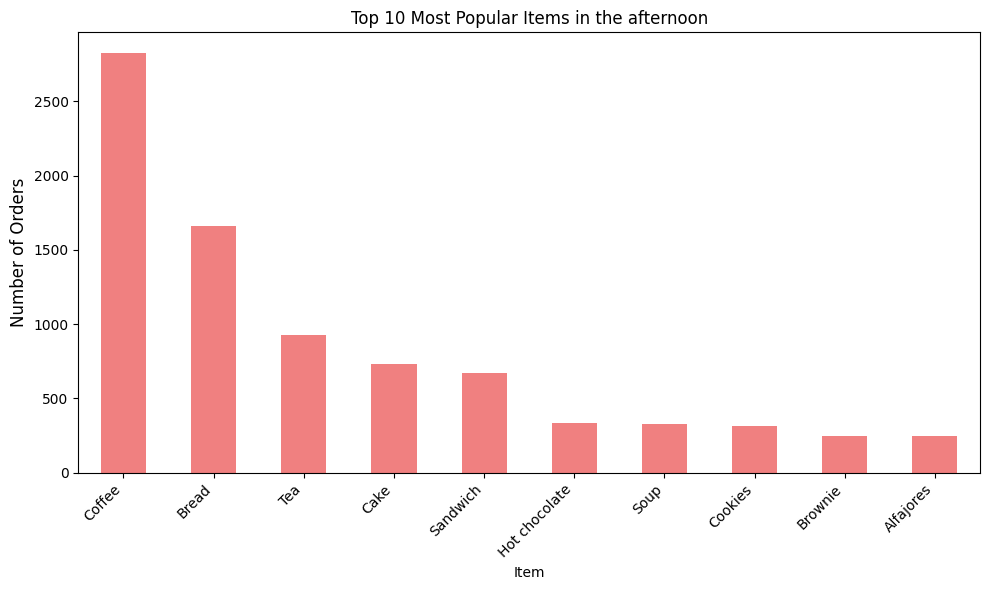

In [15]:
evening_sales = df[df['period_day'] == 'evening']

# Count the frequency of orders for each item in the evening
evening_item_counts = evening_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_evening_items = evening_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_evening_items.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the Evening', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

morning_sales = df[df['period_day'] == 'morning']

# Count the frequency of orders for each item in the evening
morning_item_counts = morning_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_morning_item = morning_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_morning_item.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the Morning')
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

night_sales = df[df['period_day'] == 'night']

# Count the frequency of orders for each item in the evening
night_item_counts = night_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_night_item = night_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_night_item.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the night')
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


afternoon_sales = df[df['period_day'] == 'afternoon']

# Count the frequency of orders for each item in the evening
afternoon_item_counts = afternoon_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_afternoon_item = afternoon_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_afternoon_item.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the afternoon')
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

21. It turns out that there is something different in the plot above, the insight is ____

Item yang paling banyak dibeli adalah kopi dan transaksi toko lebih banyak saat pagi dan siang sedangkan saat malam hari jauh lebih sedikit

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


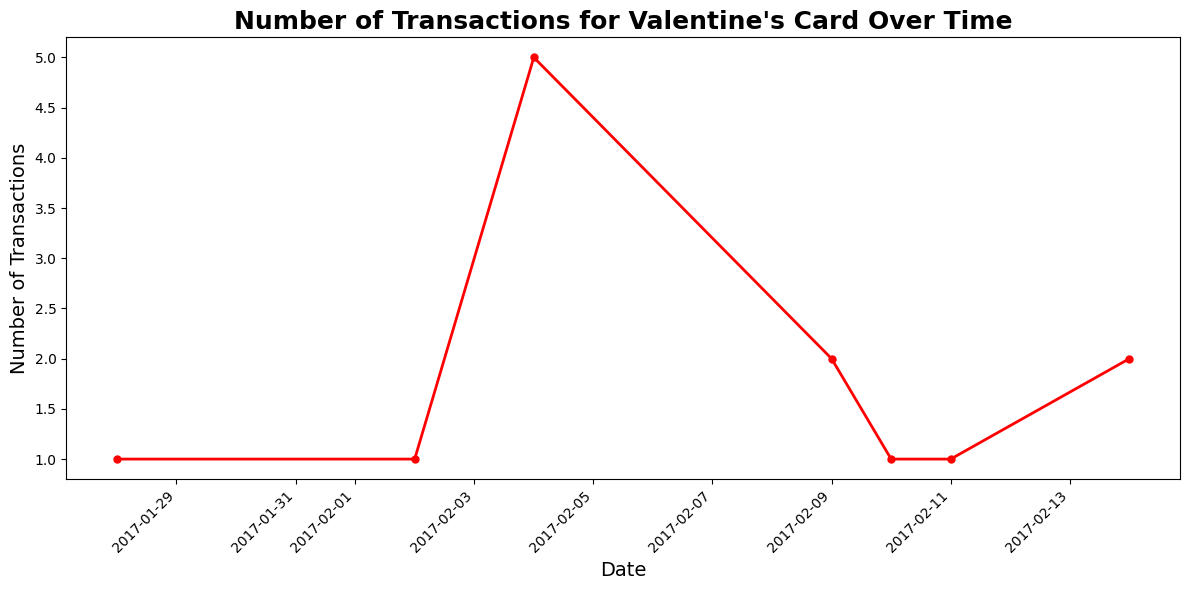

In [16]:
#22
# Filter the dataframe to include only the rows for the Valentine's card
valentine_sales = df[df['Item'] == 'Valentine\'s card']

# Group by 'date' and count the number of transactions per day
valentine_sales_daily = valentine_sales.groupby('date').size()

# Plot the line chart
plt.figure(figsize=(12, 6))
valentine_sales_daily.plot(kind='line', marker='o', color='red', linestyle='-', linewidth=2, markersize=5)

# Add title and labels with improved style
plt.title('Number of Transactions for Valentine\'s Card Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better visibility


# Show the plot
plt.tight_layout()
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____

Transaksi valentine card paling terjadi saat mendekati hari valentine yakni 14 Februari

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [21]:
# 24
apriori_data = pd.crosstab(df['Transaction'], df['Item'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#25

# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-024034fe465c>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [23]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [25]:
# 27
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Barang-barang yang paling sering dibeli meliputi Kopi, Roti, dan Kue, dengan Kopi menunjukkan tingkat asosiasi yang tinggi dengan produk lain, yang mengindikasikan bahwa produk ini sering dibeli bersama barang-barang lain. Asosiasi yang kuat terlihat antara Kopi dengan produk seperti Pastry, Kue, dan Sandwich, yang menunjukkan bahwa barang-barang ini sering dibeli bersamaan. Sebaliknya, beberapa kombinasi barang, seperti Kue dan Teh atau Jus dan Kopi, meskipun masih ada, terjadi dengan frekuensi yang lebih rendah, yang mengindikasikan bahwa kombinasi ini tidak begitu disukai oleh pelanggan. Barang seperti Alfajor, Brownie, dan Truffle memiliki dukungan yang relatif rendah, yang menunjukkan bahwa pembeliannya lebih jarang dan mungkin mewakili preferensi yang lebih spesifik. Nilai kepercayaan yang tinggi untuk pasangan seperti Kopi dan Pastry menunjukkan peluang untuk penjualan silang dan bundling promosi. Barang-barang yang menunjukkan nilai lift yang lebih tinggi, seperti Kopi dan Sandwich, menunjukkan hubungan positif yang kuat melebihi apa yang diharapkan berdasarkan popularitas individu mereka, dan metrik lift membantu mengidentifikasi pasangan barang yang lebih cenderung dibeli bersama daripada secara kebetulan. Temuan-temuan ini memberikan wawasan berharga mengenai perilaku pembelian pelanggan dan dapat memberikan strategi untuk pemasaran yang lebih terarah, penempatan produk, dan promosi.